
#  Mini Project 3
# Jeba Akewak

# Problem Description

The problem that we will look at is the Boston house price dataset.

The dataset describes 13 numerical properties of houses in Boston suburbs and is concerned with modeling the price of houses in those suburbs in thousands of dollars. As such, this is a regression predictive modeling problem. Input attributes include things like crime rate, proportion of nonretail business acres, chemical concentrations and more.

# Implementation Tasks

Implement the following tasks:

- Provide descriptive statistics about the housing dataset (use visualization whenever possible)

- Use deep learning approaches to build a predictive model where the output is “MEDV -  Median value of owner-occupied homes in $1000's”

- Define your model architecture and explain how you have decided on choosing this architecture

- Compile the model

- Divide the data to training and test set and fit your model on the training data

- Evaluate your model on the test set (use visualization for presenting your evaluation result)

We import all the necessary libraries for the implimentation

In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


Then Import the data set given at the following link :

https://archive.ics.uci.edu/ml/machine-learning-databases/housing/?C=S;O=A

This can be shown in the following code

In [2]:
# load dataset
df = pd.read_csv("housing.txt", delim_whitespace=True, header=None)
dataset = df.values
# split into input (X) and output (Y) variables
X = dataset[:,0:13]
Y = dataset[:,13]

Then add the names of the given data so that it would be easily understandable to anyone who tries to understand the data.
The name of the attributes can be found at the description folder in the following link :
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names

Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's


In [3]:
df_new_names= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM','AGE', 'DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV' ]
df.columns = df_new_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Then we visualize the data with respect to the MEDV (Median value of owner-occupied homes in $1000's).
Here we use the histogram for visualization.The range of the intervals is discretized in to fixed number of intervals called bins. The following histogram's bins are calculated based on Scott’s rule.

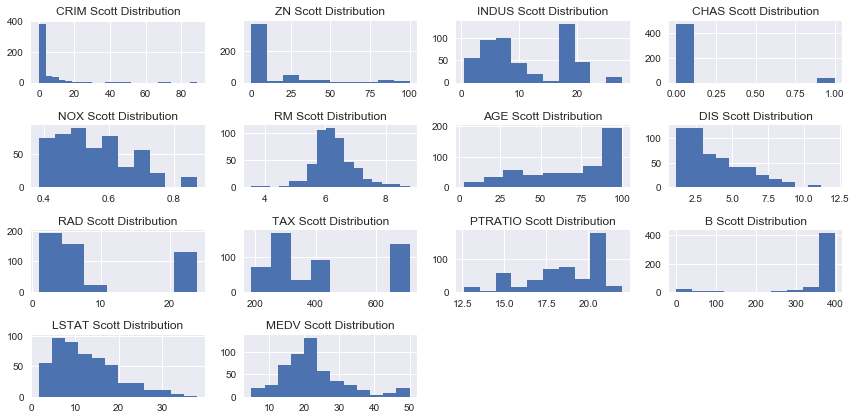

In [112]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(12,6))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins='scott',ax=ax)
        ax.set_title(var_name+" Scott Distribution")
    fig.tight_layout() # Improves appearance a bit.
    plt.show()
draw_histograms(df, df.columns, 4, 4)
plt.show()

Here we can get the description of the data frame with the describe function

In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Then we use scatter plot to see if there is any correlation between MEDV (Median value of owner-occupied homes in $1000's) and the other attributes. 

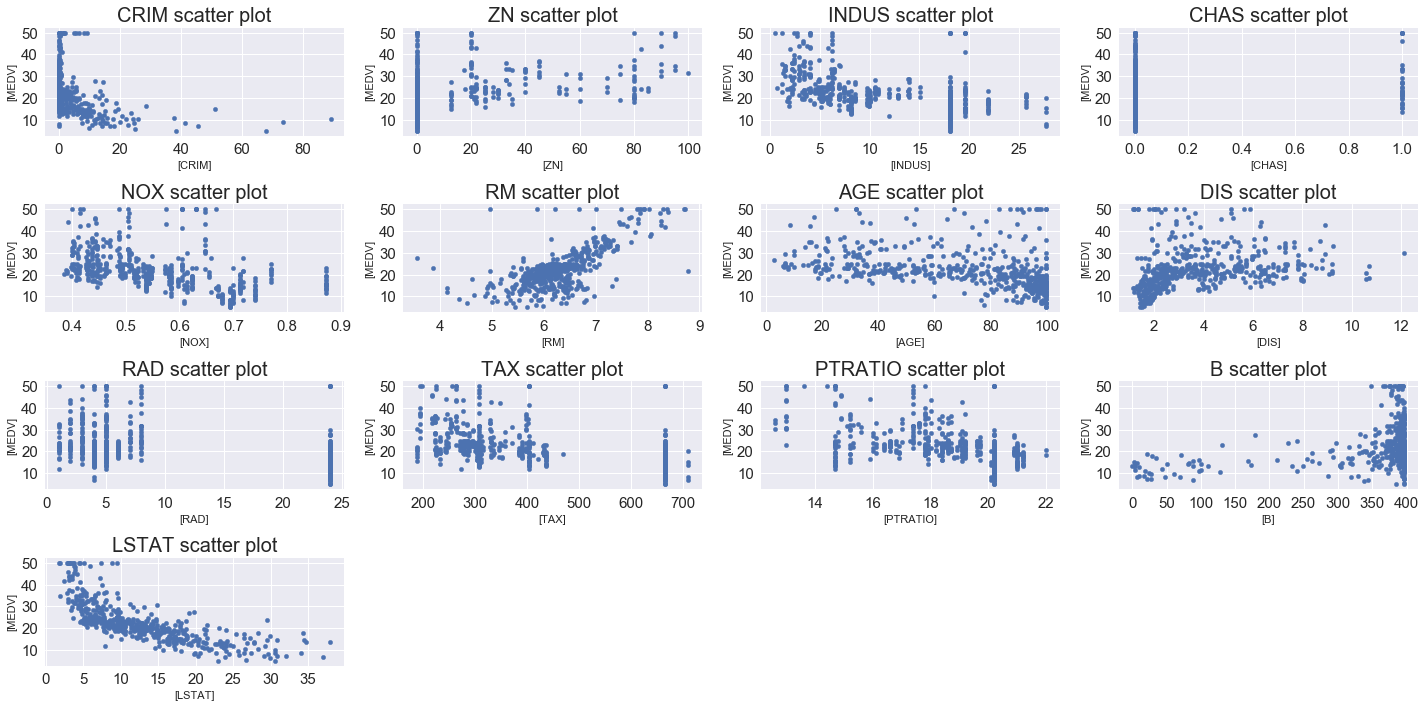

In [114]:
def draw_scatter_plot(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(20,10))
    for i, var_name in enumerate(df.columns[:-1]):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df.plot( x=[var_name], y=["MEDV"], kind="scatter", ax=ax, fontsize = 15)
        ax.set_title(var_name+" scatter plot", fontsize = 20)
    fig.tight_layout() # Improves appearance a bit.
    plt.show()
draw_scatter_plot(df, df.columns, 4, 4)
plt.show()


Then we divide the data set into X_train, X_test, Y_train, Y_test.
Here we used the test size to be 20% while the train size to be 80%.

In [5]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

/Users/akewakjeba/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
X_train.shape

(404, 13)

In [8]:
Y_train.shape

(404,)

# Develop a Baseline Neural Network Model

we define the function to create the baseline model to be evaluated. It is a simple model that has a single fully connected hidden layer with the same number of neurons as input attributes (13). The network uses good practices such as the rectifier activation function for the hidden layer. 


In [8]:
# define base model
def baseline_model():
	# create model
	model1 = Sequential()
	model1.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
	model1.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model1.compile(loss='mean_squared_error', optimizer='adam')
	return model1

The Keras wrapper object for use in scikit-learn as a regression estimator is called KerasRegressor. We create an instance and pass it both the name of the function to create the neural network model as well as some parameters to pass along to the fit() function of the model later, such as the number of epochs and batch size. Both of these are set to sensible defaults.

In [9]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
estimator1 = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=0)

In [10]:
kfold = KFold(n_splits=10, random_state=seed)
results1 = cross_val_score(estimator1, X_train, Y_train, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results1.mean(), results1.std()))

Results: 53.21 (17.95) MSE


Here I wanted to show that without standardazation the model we used above has no use. Therefore the prediction is going to be useless as can be shown on the graphs below.

In [36]:
model1=baseline_model()

In [117]:
prediction1=model1.predict(X_test)
prediction1T=model1.predict(X_train)

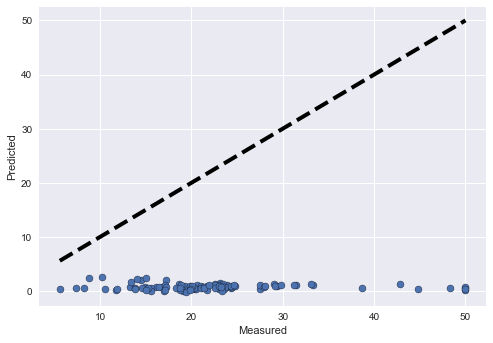

In [110]:
fig, ax = plt.subplots()
ax.scatter(Y_test, prediction1, edgecolors=(0, 0, 0))
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)# y max min values
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

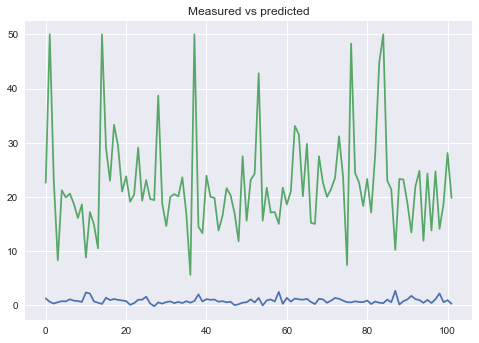

In [133]:

plt.plot(prediction1)
plt.plot(Y_test)
plt.title('Measured vs predicted')
plt.show()

We can use scikit-learn’s Pipeline framework to perform the standardization during the model evaluation process, within each fold of the cross validation. This ensures that there is no data leakage from each testset cross validation fold into the training data.

In [71]:
# evaluate model with standardized dataset
np.random.seed(seed)
estimators2 = []
estimators2.append(('standardize', StandardScaler()))
estimators2.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline1 = Pipeline(estimators2)
kfold = KFold(n_splits=10, random_state=seed)
results2 = cross_val_score(pipeline1, X_train, Y_train, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results2.mean(), results2.std()))

Standardized: 20.39 (5.71) MSE


The code above creates a scikit-learn Pipeline that first standardizes the dataset then creates and evaluate the baseline neural network model.
Then we can evaluate it on our test set and evaluate it with respect to thee training set.

In [72]:
pipeline1.fit(X_train,Y_train)

Pipeline(memory=None,
     steps=[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlp', <keras.wrappers.scikit_learn.KerasRegressor object at 0x1c1d30f050>)])

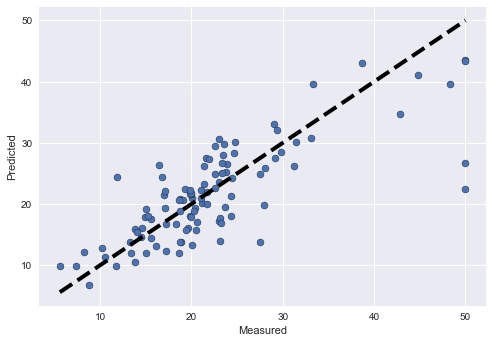

In [91]:

pre=pipeline1.predict(X_test)
preT=pipeline1.predict(X_train)
fig, ax = plt.subplots()
ax.scatter(Y_test, pre, edgecolors=(0, 0, 0))
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)# y max min values
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

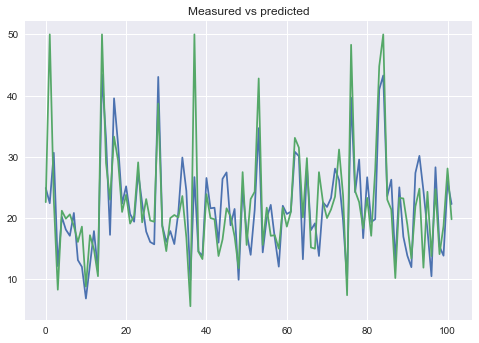

In [132]:
plt.plot(pre)
plt.plot(Y_test)
plt.title('Measured vs predicted')
plt.show()

# Tuning the neural network to Improve the performance 
# Evaluate a Deeper Network Topology


One way to improve the performance a neural network is to add more layers. This might allow the model to extract and recombine higher order features embedded in the data.

In this section we will evaluate the effect of adding one more hidden layer to the model. This is as easy as defining a new function that will create this deeper model, copied from our baseline model above. We can then insert a new line after the first hidden layer. In this case with about half the number of neurons.

In [75]:
def larger_model():
	# create model
	model2 = Sequential()
	model2.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
	model2.add(Dense(6, kernel_initializer='normal', activation='relu'))
	model2.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model2.compile(loss='mean_squared_error', optimizer='adam')
	return model2

In [76]:
np.random.seed(seed)
estimators3 = []
estimators3.append(('standardize', StandardScaler()))
estimators3.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=50, batch_size=5, verbose=0)))
pipeline2 = Pipeline(estimators3)
kfold = KFold(n_splits=10, random_state=seed)
results3 = cross_val_score(pipeline2, X_train, Y_train, cv=kfold)
print("Larger: %.2f (%.2f) MSE" % (results3.mean(), results3.std()))

Larger: 15.74 (5.26) MSE


In [107]:
pipeline2.fit(X_train,Y_train)

Pipeline(memory=None,
     steps=[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlp', <keras.wrappers.scikit_learn.KerasRegressor object at 0x1c24c90310>)])

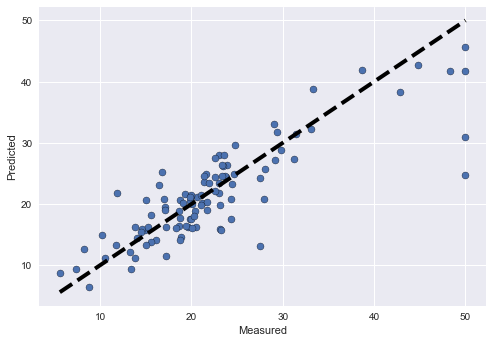

In [108]:
pre1=pipeline2.predict(X_test)
preT1=pipeline2.predict(X_train)
fig, ax = plt.subplots()
ax.scatter(Y_test, pre1, edgecolors=(0, 0, 0))
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)# y max min values
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

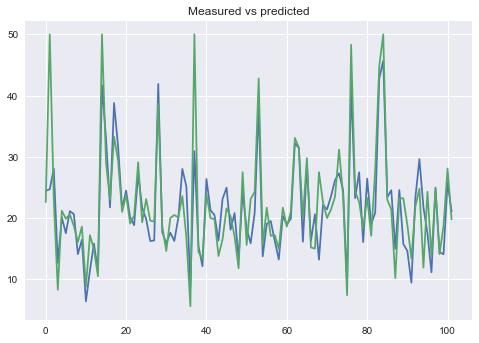

In [128]:
plt.plot(pre1)
plt.plot(Y_test)
plt.title('Measured vs predicted')
plt.show()

# Evaluate a Wider Network Topology
Another approach to increasing the representational capability of the model is to create a wider network.

In [115]:
# define wider model
def wider_model():
	# create model
	model3 = Sequential()
	model3.add(Dense(20, input_dim=13, kernel_initializer='normal', activation='relu'))
	model3.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model3.compile(loss='mean_squared_error', optimizer='adam')
	return model3

In [116]:
np.random.seed(seed)
estimators4 = []
estimators4.append(('standardize', StandardScaler()))
estimators4.append(('mlp', KerasRegressor(build_fn=wider_model, epochs=100, batch_size=5, verbose=0)))
pipeline3 = Pipeline(estimators4)
kfold = KFold(n_splits=10, random_state=seed)
results4 = cross_val_score(pipeline3, X_train, Y_train, cv=kfold)
print("Wider: %.2f (%.2f) MSE" % (results4.mean(), results4.std()))

Wider: 12.02 (4.39) MSE


In [118]:
pipeline3.fit(X_train,Y_train)

Pipeline(memory=None,
     steps=[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlp', <keras.wrappers.scikit_learn.KerasRegressor object at 0x1c3a6a6cd0>)])

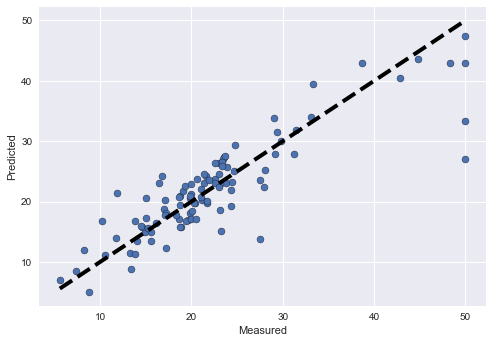

In [119]:
pre2=pipeline3.predict(X_test)
preT2=pipeline3.predict(X_train)
fig, ax = plt.subplots()
ax.scatter(Y_test, pre2, edgecolors=(0, 0, 0))
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)# y max min values
#ax.plot(X_test, Y_test)#, 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

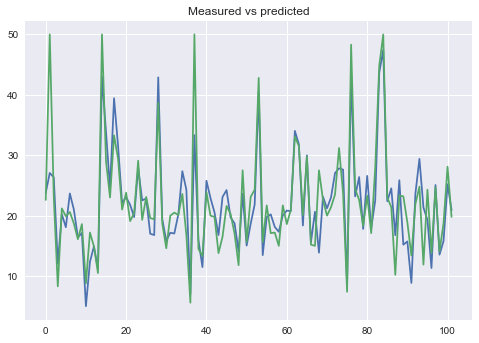

In [129]:
plt.plot(pre2)
plt.plot(Y_test)
plt.title('Measured vs predicted')
plt.show()

# kernel density estimate plots (KDE)
The kernel density estimate plots the shape of a distribution. Like the histogram, the KDE plots encode the density of observations on one axis with height along the other axis

In [121]:
rmse_scores1 = np.sqrt(results1)
print (rmse_scores1)
rmse_scores2 = np.sqrt(results2)
print (rmse_scores2)
rmse_scores3 = np.sqrt(results3)
print (rmse_scores3)
rmse_scores4 = np.sqrt(results4)
print (rmse_scores4)

[ 6.13980362  4.98835813  8.16793557  5.78142295  7.29120472  7.85903972
  7.58990178  9.0506878   8.69042919  6.27807357]
[ 4.03146453  3.99241486  4.27800987  3.68613175  3.89473249  4.87771575
  5.13060249  5.46521095  5.3022402   4.06509208]
[ 3.37153729  3.66122627  3.52718206  4.32290365  3.1045529   4.06545546
  5.28537488  4.55714188  3.92839652  3.34539973]
[ 3.25860672  2.77603946  2.88681106  4.63328506  2.31556182  3.66605137
  3.8562161   3.86739636  3.67219011  3.16357538]


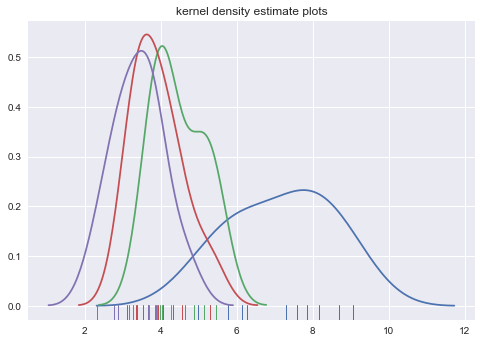

In [131]:
import seaborn as sns
plt.title('kernel density estimate plots')
sns.distplot(rmse_scores1, hist = False, rug = True);
sns.distplot(rmse_scores2, hist = False, rug = True);
sns.distplot(rmse_scores3, hist = False, rug = True);
sns.distplot(rmse_scores4, hist = False, rug = True);
